In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Uyarıları kapat (opsiyonel)
import warnings
warnings.filterwarnings('ignore')

print("Kütüphaneler yüklendi!")

Kütüphaneler yüklendi!


In [2]:
# Veri dosyasını yükle (Kaggle input yolunda)
file_path = '/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv'

df = pd.read_csv(file_path)

# İlk 5 satırı göster
print("Veri seti boyutu:", df.shape)
print("\nİlk 5 satır:")
df.head()

Veri seti boyutu: (7235678, 6)

İlk 5 satır:


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [3]:
# Sütun isimleri ve veri tipleri
print("Sütunlar ve tipleri:")
print(df.info())

# Temel istatistikler
print("\nTemel İstatistikler:")
print(df.describe())

# Tarih sütununu datetime'a çevir (Timestamp Unix formatında)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index('Timestamp', inplace=True)
print("\nTarih indeksi ayarlandı. Son tarih:", df.index.max())

Sütunlar ve tipleri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7235678 entries, 0 to 7235677
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 331.2 MB
None

Temel İstatistikler:
          Timestamp          Open          High           Low         Close  \
count  7.235678e+06  7.235678e+06  7.235678e+06  7.235678e+06  7.235678e+06   
mean   1.542485e+09  2.030474e+04  2.031208e+04  2.029719e+04  2.030474e+04   
std    1.253303e+08  2.871351e+04  2.872124e+04  2.870564e+04  2.871351e+04   
min    1.325412e+09  3.800000e+00  3.800000e+00  3.800000e+00  3.800000e+00   
25%    1.433947e+09  4.380000e+02  4.382900e+02  4.379200e+02  4.380100e+02   
50%    1.542482e+09  7.135350e+03  7.139850e+03  7.131075e+03  7.135495e+03   
75%    1.651018e+09  2.990000e+04  2.990500e+04  2.98

Eksik Değerler:
        Eksik Sayısı  Eksik Yüzdesi (%)
Open               0                0.0
High               0                0.0
Low                0                0.0
Close              0                0.0
Volume             0                0.0


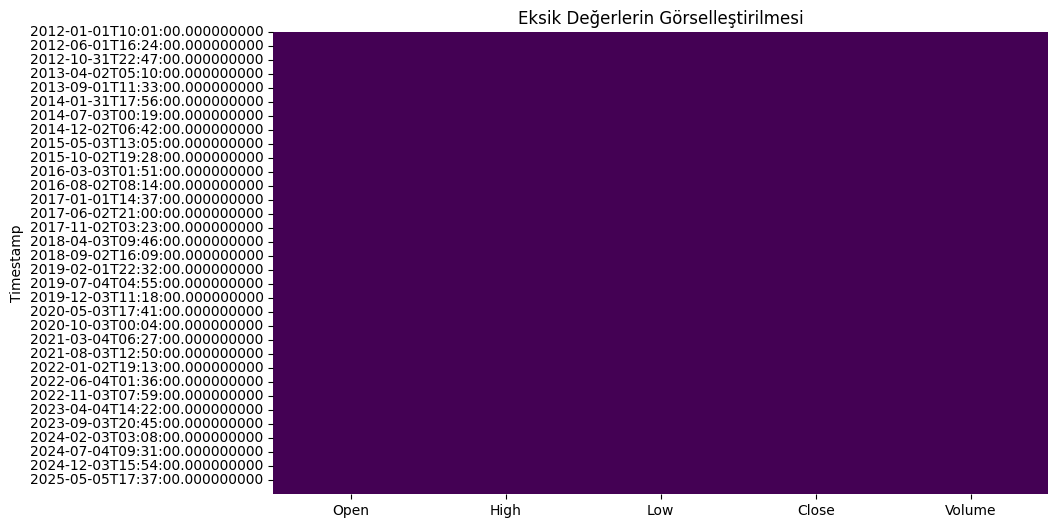

In [4]:
# Eksik değerlerin sayısını ve oranını kontrol et
print("Eksik Değerler:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({'Eksik Sayısı': missing_values, 'Eksik Yüzdesi (%)': missing_percentage})
print(missing_summary)

# Eksik değerleri görselleştir
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Eksik Değerlerin Görselleştirilmesi')
plt.show()

Negatif veya sıfır fiyatlar:
Open <= 0: 0
High <= 0: 0
Low <= 0: 0
Close <= 0: 0
Volume <= 0: 1310365


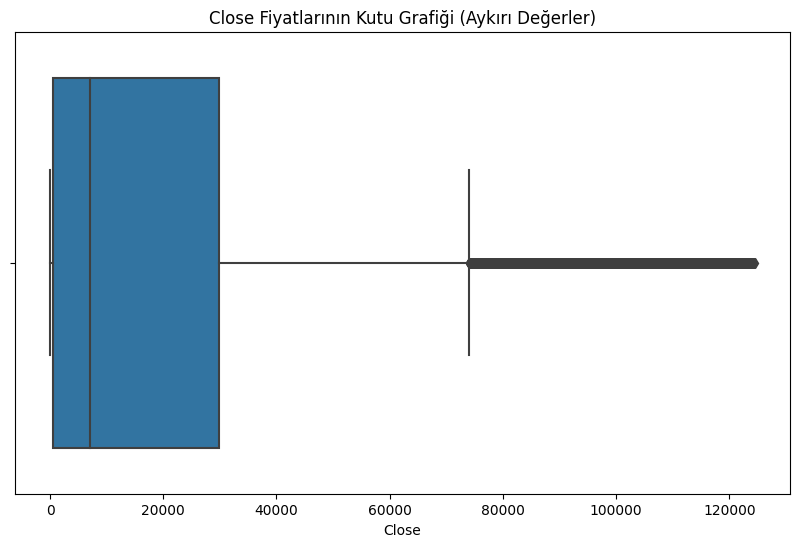

In [5]:
# Negatif veya sıfır fiyatları kontrol et
print("Negatif veya sıfır fiyatlar:")
print("Open <= 0:", (df['Open'] <= 0).sum())
print("High <= 0:", (df['High'] <= 0).sum())
print("Low <= 0:", (df['Low'] <= 0).sum())
print("Close <= 0:", (df['Close'] <= 0).sum())

# Volume için sıfır veya negatif değerler
print("Volume <= 0:", (df['Volume'] <= 0).sum())

# Aykırı değerleri görselleştir (örneğin, Close fiyatı için boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'])
plt.title('Close Fiyatlarının Kutu Grafiği (Aykırı Değerler)')
plt.show()

In [6]:
# Zaman aralıklarının tutarlılığını kontrol et (1 dakikalık veri)
time_diff = df.index.to_series().diff().dt.total_seconds()
print("Zaman aralıklarının özeti (saniye):")
print(time_diff.describe())

# Eksik zaman aralıklarını tespit et
missing_timestamps = time_diff[time_diff > 60]  # 1 dakikadan büyük aralıklar
print("\nEksik zaman aralıkları (1 dakikadan büyük):", len(missing_timestamps))

# Gerekirse veriyi saatlik frekansa çevir
df_hourly = df.resample('H').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})
print("\nSaatlik Veri Boyutu:", df_hourly.shape)

Zaman aralıklarının özeti (saniye):
count    7.235677e+06
mean     6.000962e+01
std      2.587436e+01
min      6.000000e+01
25%      6.000000e+01
50%      6.000000e+01
75%      6.000000e+01
max      6.966000e+04
Name: Timestamp, dtype: float64

Eksik zaman aralıkları (1 dakikadan büyük): 1

Saatlik Veri Boyutu: (120614, 5)


In [7]:
print(df[['Volume']].head(10))

                     Volume
Timestamp                  
2012-01-01 10:01:00     0.0
2012-01-01 10:02:00     0.0
2012-01-01 10:03:00     0.0
2012-01-01 10:04:00     0.0
2012-01-01 10:05:00     0.0
2012-01-01 10:06:00     0.0
2012-01-01 10:07:00     0.0
2012-01-01 10:08:00     0.0
2012-01-01 10:09:00     0.0
2012-01-01 10:10:00     0.0


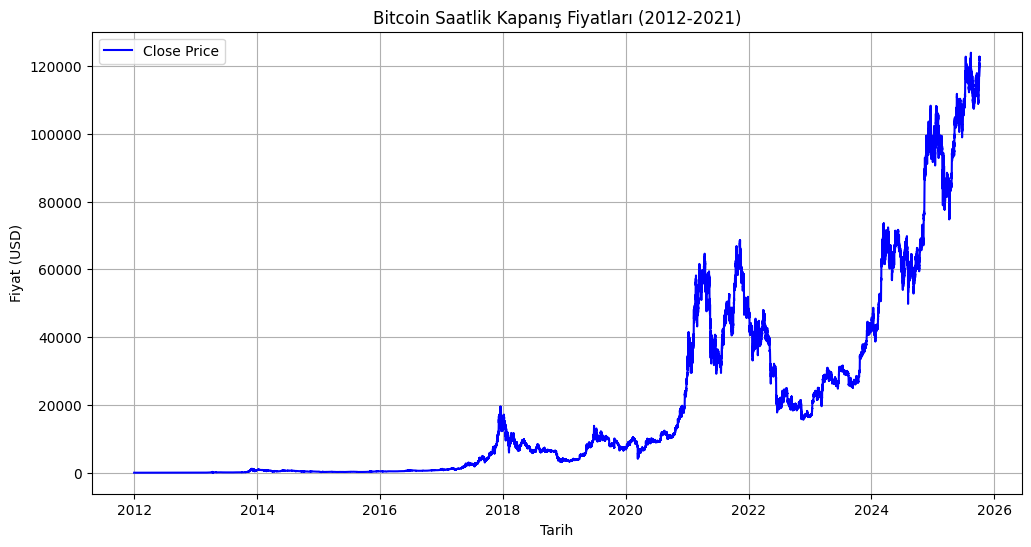

In [8]:
# Kapanış fiyatlarının zaman serisi grafiği
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['Close'], label='Close Price', color='blue')
plt.title('Bitcoin Saatlik Kapanış Fiyatları (2012-2021)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.grid(True)
plt.show()

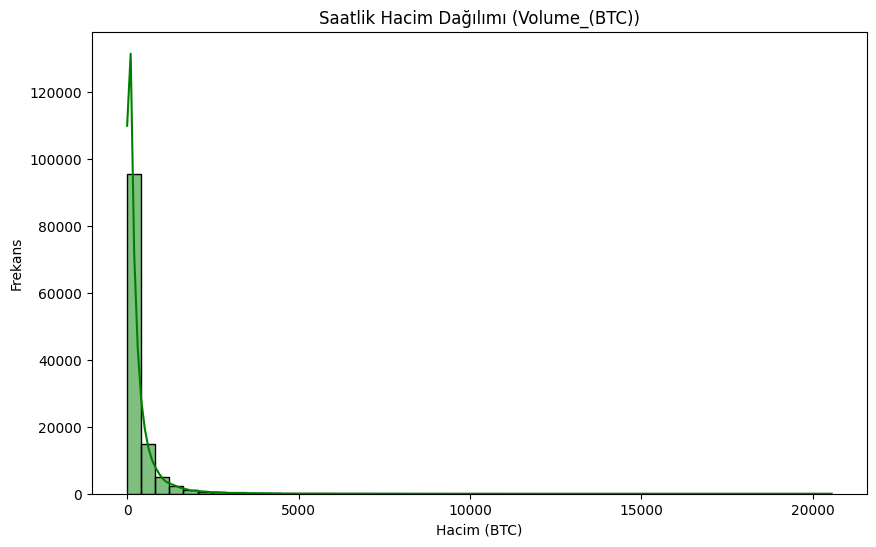

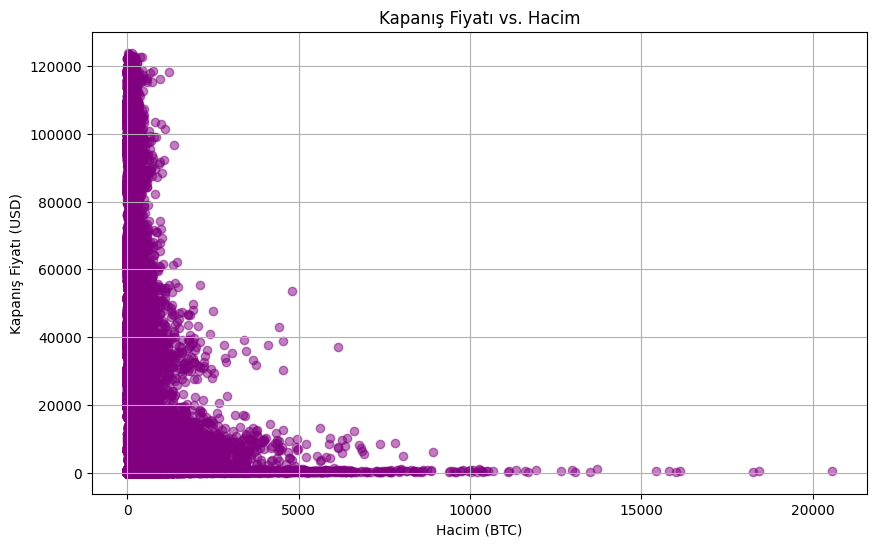

In [9]:
# Hacim histogramı
plt.figure(figsize=(10, 6))
sns.histplot(df_hourly['Volume'], bins=50, kde=True, color='green')
plt.title('Saatlik Hacim Dağılımı (Volume_(BTC))')
plt.xlabel('Hacim (BTC)')
plt.ylabel('Frekans')
plt.show()

# Hacim ve kapanış fiyatı ilişkisi
plt.figure(figsize=(10, 6))
plt.scatter(df_hourly['Volume'], df_hourly['Close'], alpha=0.5, color='purple')
plt.title('Kapanış Fiyatı vs. Hacim')
plt.xlabel('Hacim (BTC)')
plt.ylabel('Kapanış Fiyatı (USD)')
plt.grid(True)
plt.show()

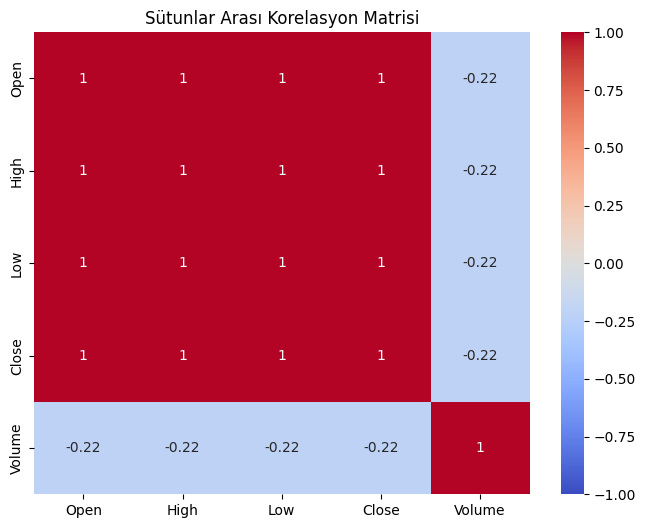

In [10]:
# Sütunlar arası korelasyon
plt.figure(figsize=(8, 6))
sns.heatmap(df_hourly.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sütunlar Arası Korelasyon Matrisi')
plt.show()

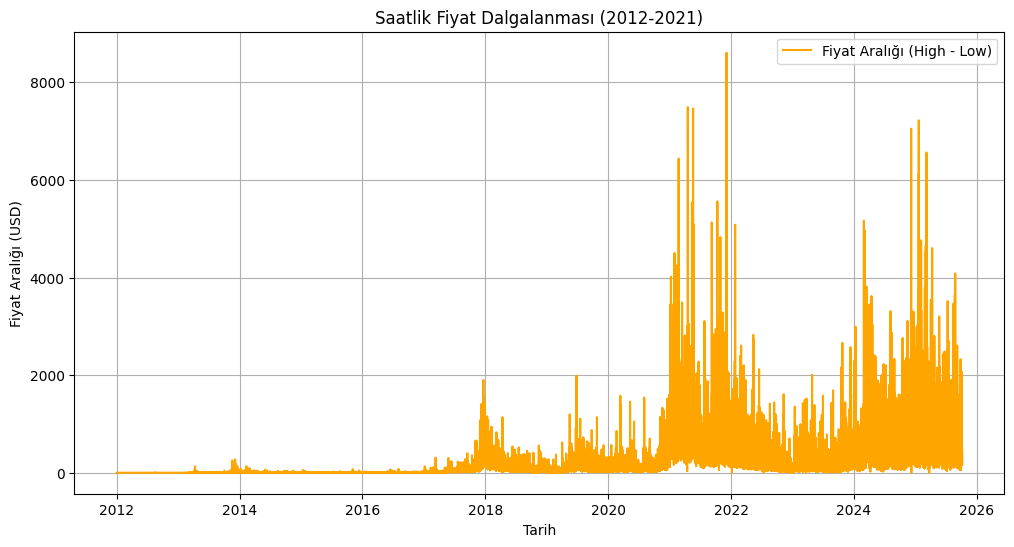

In [11]:
# Günlük fiyat aralığı (High - Low)
df_hourly['Price_Range'] = df_hourly['High'] - df_hourly['Low']

plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['Price_Range'], label='Fiyat Aralığı (High - Low)', color='orange')
plt.title('Saatlik Fiyat Dalgalanması (2012-2021)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat Aralığı (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
print(df[df['Volume'] > 0][['Volume']].head(10))

                        Volume
Timestamp                     
2012-01-01 20:28:00  10.000000
2012-01-02 03:45:00  10.100000
2012-01-03 01:04:00  19.048000
2012-01-03 16:45:00   2.419173
2012-01-03 19:22:00   0.680000
2012-01-03 19:54:00  29.319392
2012-01-03 20:32:00  29.302457
2012-01-03 22:10:00  11.285444
2012-01-03 22:14:00   0.020000
2012-01-03 22:26:00  11.000000


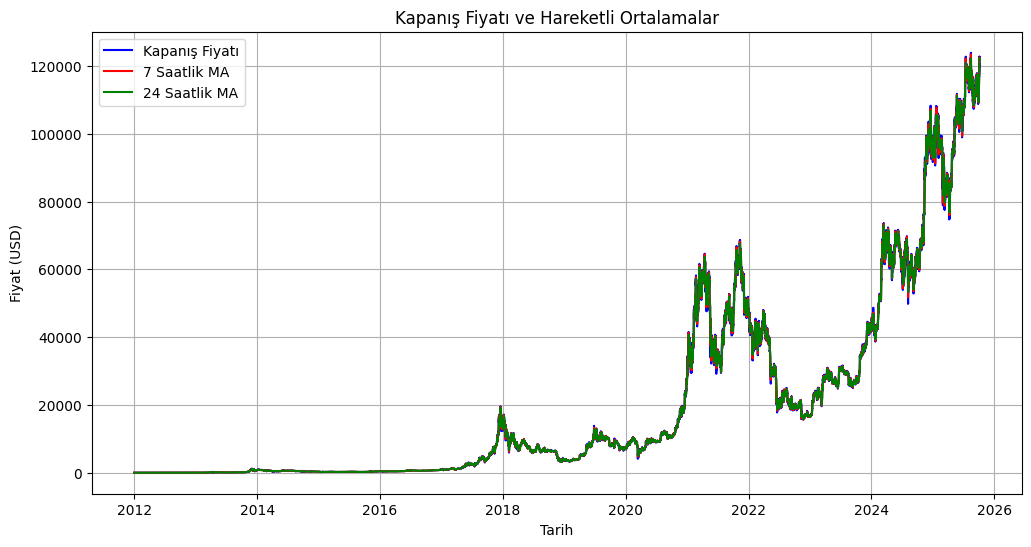

In [13]:
# Saatlik veri setiyle çalışıyoruz
# 7 saatlik ve 24 saatlik hareketli ortalamalar
df_hourly['7 Saatlik Hareketli Ortalama'] = df_hourly['Close'].rolling(window=7).mean()
df_hourly['24 Saatlik Hareketli Ortalama'] = df_hourly['Close'].rolling(window=24).mean()

# Hareketli ortalamaları görselleştir
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['Close'], label='Kapanış Fiyatı', color='blue', alpha=1)
plt.plot(df_hourly.index, df_hourly['7 Saatlik Hareketli Ortalama'], label='7 Saatlik MA', color='red')
plt.plot(df_hourly.index, df_hourly['24 Saatlik Hareketli Ortalama'], label='24 Saatlik MA', color='green')
plt.title('Kapanış Fiyatı ve Hareketli Ortalamalar')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.grid(True)
plt.show()

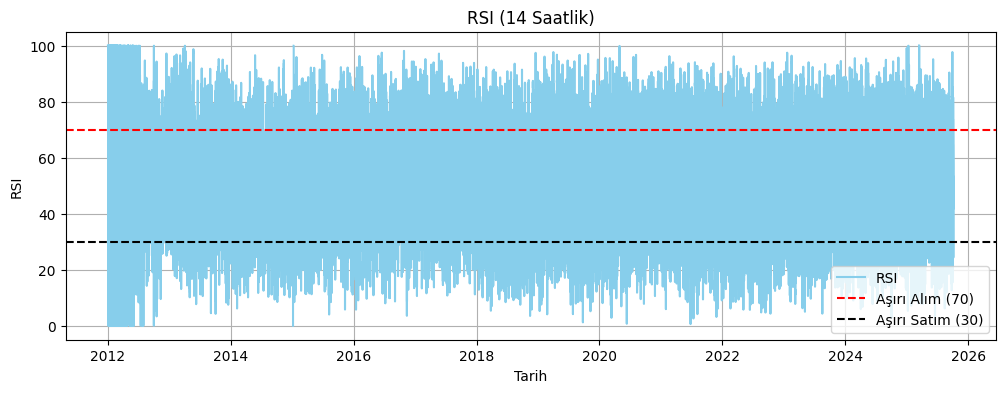

In [14]:
# RSI (Relative Strength Index) hesaplama
def calculate_rsi(data, periods=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=periods).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=periods).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df_hourly['RSI'] = calculate_rsi(df_hourly['Close'])

# RSI görselleştirme
plt.figure(figsize=(12, 4))
plt.plot(df_hourly.index, df_hourly['RSI'], label='RSI', color='skyblue')
plt.axhline(70, color='red', linestyle='--', alpha=1, label='Aşırı Alım (70)')
plt.axhline(30, color='black', linestyle='--', alpha=1, label='Aşırı Satım (30)')
plt.title('RSI (14 Saatlik)')
plt.xlabel('Tarih')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

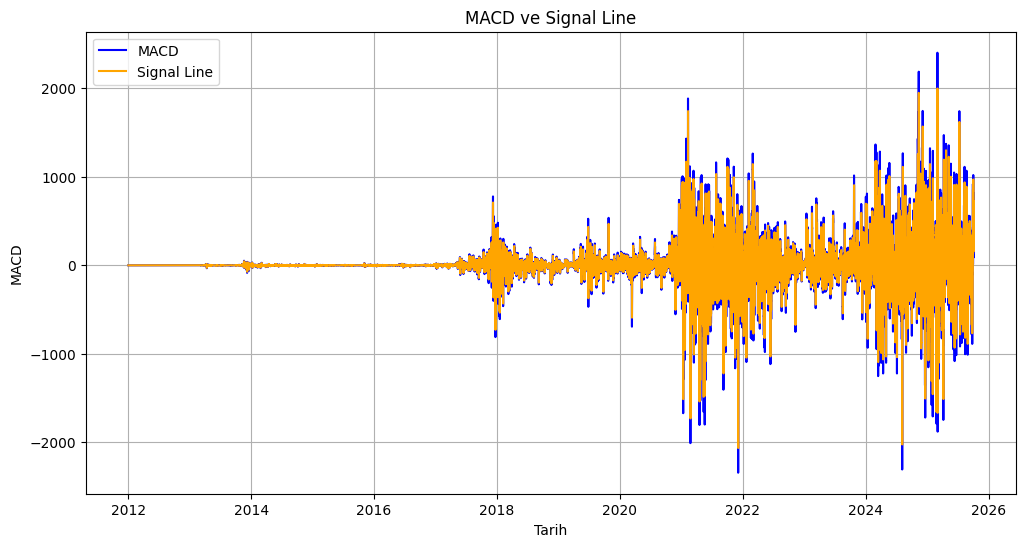

In [15]:
# MACD (Moving Average Convergence Divergence) hesaplama
df_hourly['EMA12'] = df_hourly['Close'].ewm(span=12, adjust=False).mean()
df_hourly['EMA26'] = df_hourly['Close'].ewm(span=26, adjust=False).mean()
df_hourly['MACD'] = df_hourly['EMA12'] - df_hourly['EMA26']
df_hourly['Signal_Line'] = df_hourly['MACD'].ewm(span=9, adjust=False).mean()

# MACD görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['MACD'], label='MACD', color='blue')
plt.plot(df_hourly.index, df_hourly['Signal_Line'], label='Signal Line', color='orange')
plt.title('MACD ve Signal Line')
plt.xlabel('Tarih')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Geçmiş 1, 2, 3 saatlik kapanış fiyatları
df_hourly['Lag1'] = df_hourly['Close'].shift(1)
df_hourly['Lag2'] = df_hourly['Close'].shift(2)
df_hourly['Lag3'] = df_hourly['Close'].shift(3)

# Volatilite (High - Low zaten hesaplandı, tekrar ekleyelim)
df_hourly['Price_Range'] = df_hourly['High'] - df_hourly['Low']

# Zaman bazlı özellikler (saat, gün, ay)
df_hourly['Hour'] = df_hourly.index.hour
df_hourly['Day'] = df_hourly.index.day
df_hourly['Month'] = df_hourly.index.month

# Yeni özellikleri göster
print("Yeni özellikler eklendi. İlk 5 satır:")
print(df_hourly[['Close', '7 Saatlik Hareketli Ortalama', '24 Saatlik Hareketli Ortalama', 'RSI', 'MACD', 'Signal_Line', 'Lag1', 'Lag2', 'Lag3', 'Price_Range', 'Hour', 'Day', 'Month']].head())

Yeni özellikler eklendi. İlk 5 satır:
                     Close  7 Saatlik Hareketli Ortalama  \
Timestamp                                                  
2012-01-01 10:00:00   4.58                           NaN   
2012-01-01 11:00:00   4.58                           NaN   
2012-01-01 12:00:00   4.58                           NaN   
2012-01-01 13:00:00   4.58                           NaN   
2012-01-01 14:00:00   4.58                           NaN   

                     24 Saatlik Hareketli Ortalama  RSI  MACD  Signal_Line  \
Timestamp                                                                    
2012-01-01 10:00:00                            NaN  NaN   0.0          0.0   
2012-01-01 11:00:00                            NaN  NaN   0.0          0.0   
2012-01-01 12:00:00                            NaN  NaN   0.0          0.0   
2012-01-01 13:00:00                            NaN  NaN   0.0          0.0   
2012-01-01 14:00:00                            NaN  NaN   0.0          0.

In [17]:
# NaN içeren satırları kaldır
df_hourly.dropna(inplace=True)
print("NaN temizlendikten sonra veri boyutu:", df_hourly.shape)
print("\nİlk 5 satır:")
print(df_hourly[['Close', '7 Saatlik Hareketli Ortalama', '24 Saatlik Hareketli Ortalama', 'RSI', 'MACD', 'Signal_Line', 'Lag1', 'Lag2', 'Lag3', 'Price_Range', 'Hour', 'Day', 'Month']].head())

NaN temizlendikten sonra veri boyutu: (120277, 19)

İlk 5 satır:
                     Close  7 Saatlik Hareketli Ortalama  \
Timestamp                                                  
2012-01-02 09:00:00    5.0                           5.0   
2012-01-02 10:00:00    5.0                           5.0   
2012-01-02 11:00:00    5.0                           5.0   
2012-01-02 12:00:00    5.0                           5.0   
2012-01-02 13:00:00    5.0                           5.0   

                     24 Saatlik Hareketli Ortalama    RSI      MACD  \
Timestamp                                                             
2012-01-02 09:00:00                       4.778333  100.0  0.107112   
2012-01-02 10:00:00                       4.795833  100.0  0.105142   
2012-01-02 11:00:00                       4.813333  100.0  0.102401   
2012-01-02 12:00:00                       4.830833  100.0  0.099086   
2012-01-02 13:00:00                       4.848333  100.0  0.095359   

                

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Özellikler ve hedef değişken
features = ['7 Saatlik Hareketli Ortalama', '24 Saatlik Hareketli Ortalama', 'RSI', 'MACD', 'Signal_Line', 'Lag1', 'Lag2', 'Lag3', 'Price_Range', 'Volume', 'Hour', 'Day', 'Month']
target = 'Close'

# Veri setini X (özellikler) ve y (hedef) olarak ayır
X = df_hourly[features]
y = df_hourly[target]

# Eğitim ve test setlerine böl (son %20 test için)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Özellikleri ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Eğitim seti boyutu:", X_train_scaled.shape)
print("Test seti boyutu:", X_test_scaled.shape)

Eğitim seti boyutu: (96221, 13)
Test seti boyutu: (24056, 13)


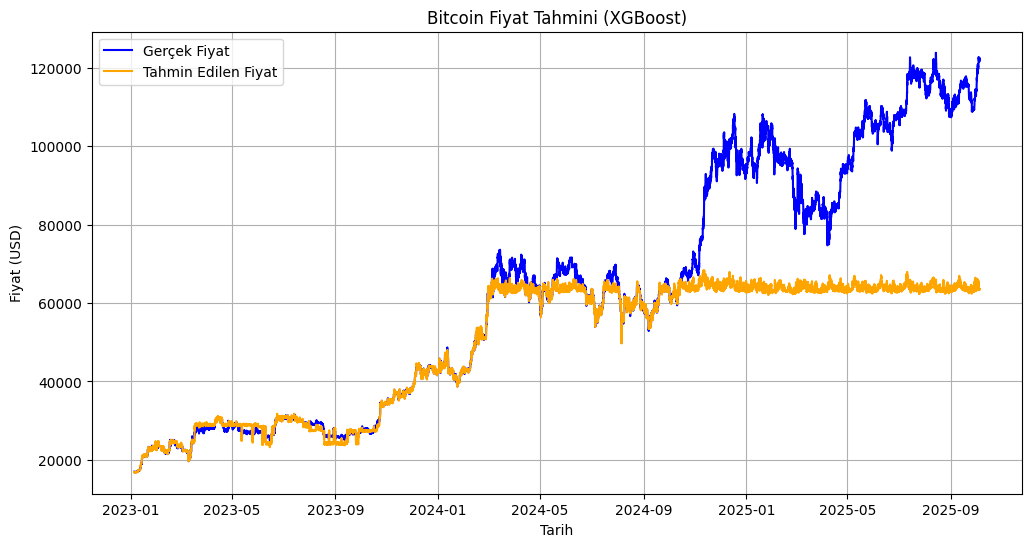

In [19]:
# XGBoost modelini oluştur ve eğit
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train)

# Tahmin yap
y_pred = model.predict(X_test_scaled)

# Tahminleri görselleştir
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Gerçek Fiyat', color='blue')
plt.plot(y_test.index, y_pred, label='Tahmin Edilen Fiyat', color='orange')
plt.title('Bitcoin Fiyat Tahmini (XGBoost)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hata metrikleri
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performansı:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

Model Performansı:
MSE: 506075979.15
RMSE: 22496.13
MAE: 13141.90
R²: 0.48


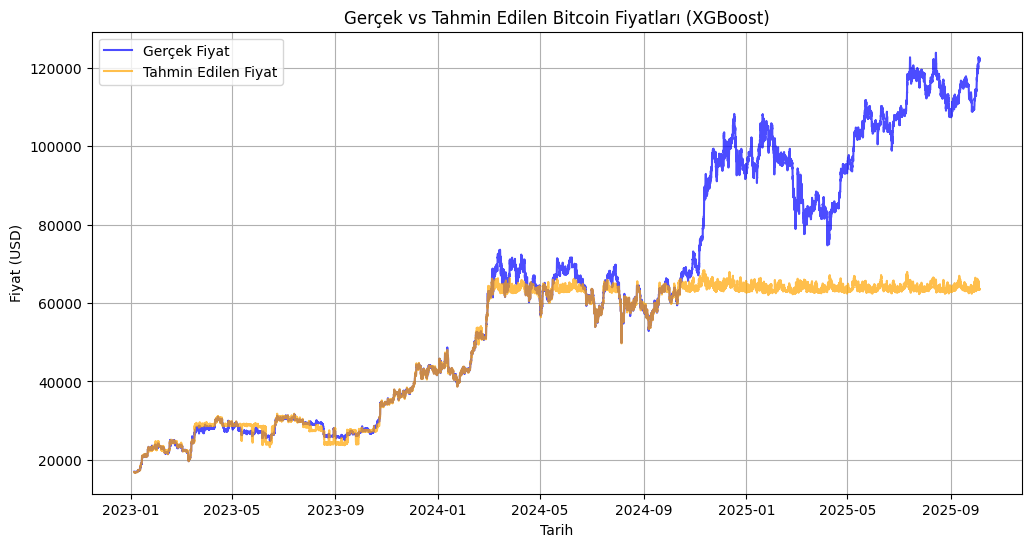

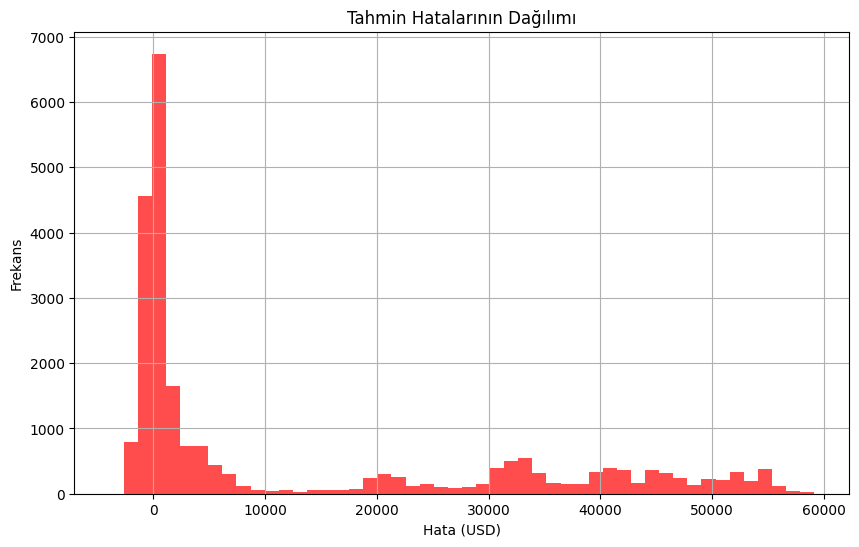

In [21]:
# Hata grafiği (Gerçek vs Tahmin)
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Gerçek Fiyat', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Tahmin Edilen Fiyat', color='orange', alpha=0.7)
plt.title('Gerçek vs Tahmin Edilen Bitcoin Fiyatları (XGBoost)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Hata dağılımı
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, color='red', alpha=0.7)
plt.title('Tahmin Hatalarının Dağılımı')
plt.xlabel('Hata (USD)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

Özellik Önem Dereceleri:
                          Feature  Importance
6                            Lag2    0.373577
0    7 Saatlik Hareketli Ortalama    0.272300
5                            Lag1    0.258714
7                            Lag3    0.077850
1   24 Saatlik Hareketli Ortalama    0.017458
11                            Day    0.000026
12                          Month    0.000020
2                             RSI    0.000014
8                     Price_Range    0.000011
9                          Volume    0.000009
4                     Signal_Line    0.000009
3                            MACD    0.000009
10                           Hour    0.000005


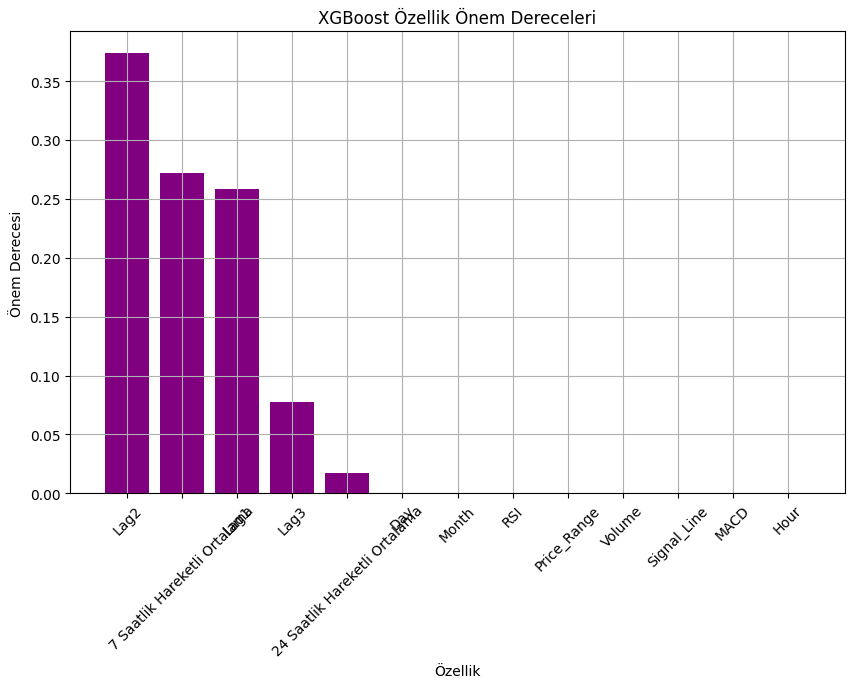

In [22]:
# Özellik önem derecesi
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Özellik Önem Dereceleri:")
print(feature_importance)

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='purple')
plt.title('XGBoost Özellik Önem Dereceleri')
plt.xlabel('Özellik')
plt.ylabel('Önem Derecesi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Log Dönüşümlü Model Performansı:
MSE: 496967130.02
RMSE: 22292.76
MAE: 12976.15
R²: 0.49


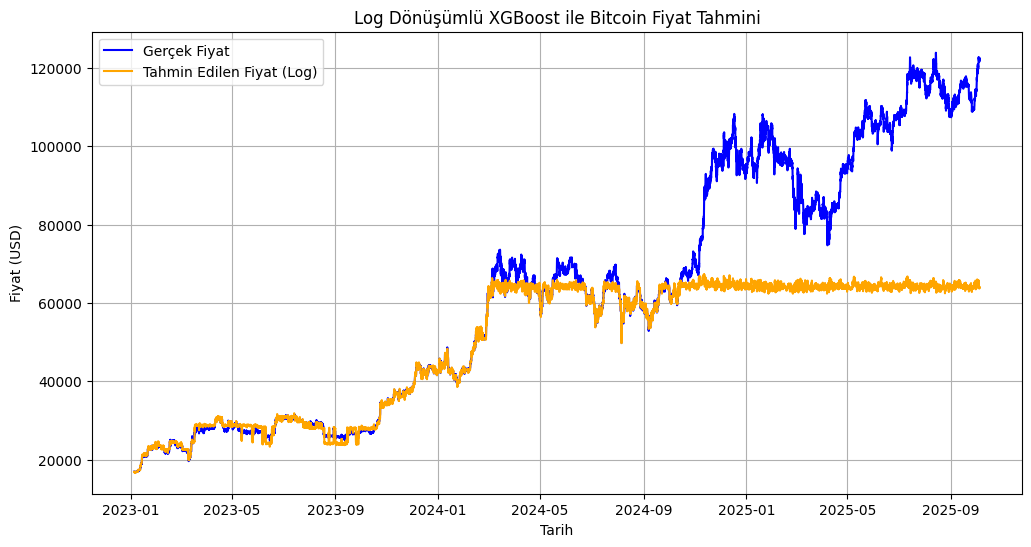

In [23]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Log dönüşümü (sıfır veya negatif fiyat olmadığından güvenli)
y_log = np.log1p(y)  # log(1 + y) to handle zero values (if any)

# Eğitim ve test setlerine tekrar böl
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, shuffle=False)

# Özellikleri ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost modelini log hedefiyle eğit
model_log = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_log.fit(X_train_scaled, y_train_log)

# Tahmin yap ve ters log dönüşümü uygula
y_pred_log = model_log.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)  # exp(y_pred_log) - 1

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Log Dönüşümlü Model Performansı:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# Tahminleri görselleştir
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Gerçek Fiyat', color='blue')
plt.plot(y_test.index, y_pred, label='Tahmin Edilen Fiyat (Log)', color='orange')
plt.title('Log Dönüşümlü XGBoost ile Bitcoin Fiyat Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.grid(True)
plt.show()